In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

<IPython.core.display.Javascript object>

In [4]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<Axes: >

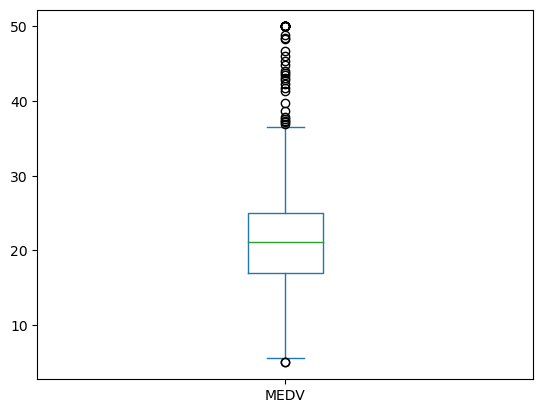

In [5]:
# For the "Median value of owner-occupied homes" provide a boxplot
df['MEDV'].plot(kind='box')

##### From the box plot we can deduct that:
- Median of MEDV is around 20000 dollars
- 50% of the MEDV data lies between 16000 dollars to 26000 dollars
- MEDV has many outliers

<Axes: xlabel='YES/NO', ylabel='Count'>

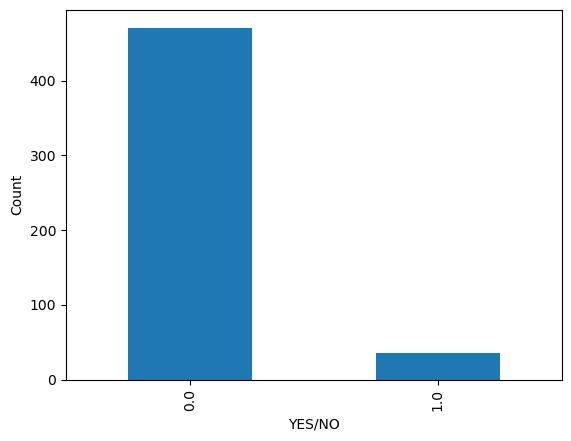

In [10]:
# Provide a  bar plot for the Charles river variable
df['CHAS'].value_counts().plot(kind='bar',xlabel='YES/NO', ylabel='Count')

- Most of the houses are not bounded by charles river

<Axes: xlabel='MEDV', ylabel='age_group'>

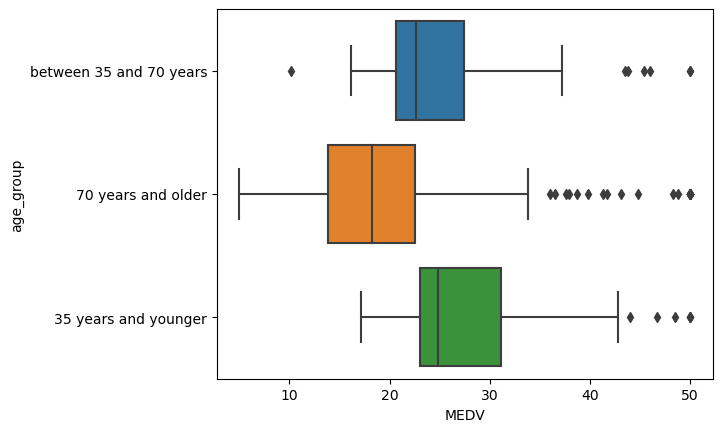

In [12]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
import seaborn as sns
df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x = 'MEDV', y = 'age_group', data = df)

- Median of MEDV is higher when the age is lower

<Axes: xlabel='INDUS', ylabel='NOX'>

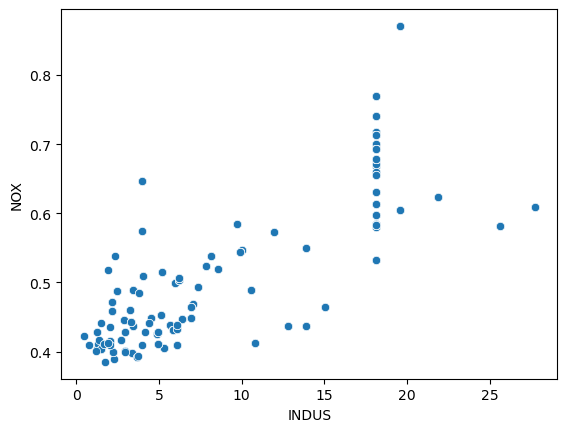

In [13]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
sns.scatterplot(y = 'NOX', x = 'INDUS', data = df)

- The scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.Higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

<Axes: xlabel='PTRATIO', ylabel='count'>

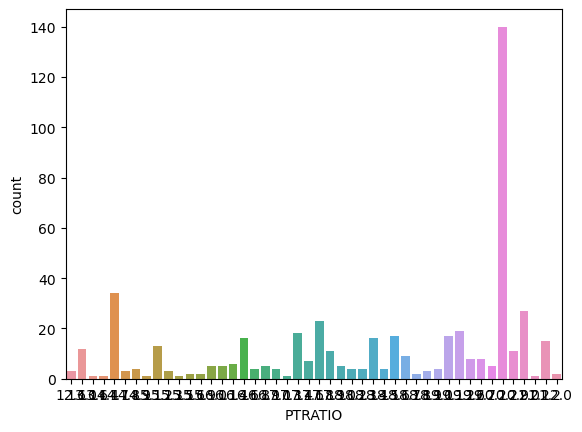

In [15]:
# Create a histogram for the pupil to teacher ratio variable
sns.countplot(x = 'PTRATIO', data = df)

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Ho -> There's no significant difference in median value between houses bounded and not bounded by the Charles River
- Ha -> There's a significant difference in median value between houses bounded and not bounded by the Charles River
- Considering level of significance is 5% (alpha=0.05)

In [19]:
import scipy.stats as st

bounded = df[df['CHAS'] == 0.0]['MEDV']
not_bounded = df[df['CHAS'] == 1.0]['MEDV']

st.ttest_ind(bounded,not_bounded,equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

- Since pvalue is less than alpha(0.05), we reject null hypothesis. There is significant difference between median value of houses bounded and not bounded by the Charles River.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Ho: There is no difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
- Ha: There is difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
- Considering level of significance as 5%, alpha=0.05

In [21]:
less_than_35=df[(df['AGE'] <= 35)]['MEDV']
less_than_70=df[(df['AGE'] > 35) & (df['AGE'] < 70)]['MEDV']
greater_than_70=df[(df['AGE'] >= 70)]['MEDV']

st.f_oneway(less_than_35,less_than_70,greater_than_70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

- Since pvalue < alpha(0.05) , we reject null hypothesis. i.e There is difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- Ho: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town
- Ha: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town
- Considering level of significance as 5%, alpha=0.05

In [22]:
st.pearsonr(df.NOX,df.INDUS)

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

- Since pvalue < alpha, we reject null hypothesis i.e Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- Ho : There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- Ha : There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- Considering level of significance 5%, alpha=0.05

In [23]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        22:15:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Since pvalue < alpha we reject null hypothesis, i.e There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes